## Auctioning Used-Car Classifier

#### Author: Andrew Tran

## Blog Post Inspiration and Objectives

In this blog post, I was hoping to apply my basic understanding of classification that was taught in this Machine Learning course early in the semester. Additionally, I was interested in the traditional question posed by those in the college and just graduating from it as most try to purchase their first car. Specifically, what factors lead to a mutually beneficial first starter car? In the general sense, this dataset is not directly a Machine Learning problem, but I thought I gave it a chance. Through seeing the profit made by selling the car compared to its market-valued price, determining the return-of-investment (ROI) made on the vehicle introduces the concept of binary classification here. With that being said, let's try to tackle this problem with some Machine Learning:

## Data Preprocessing - Cleaning and Analytics

In [1]:
# Import needed libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
plt.style.use("fivethirtyeight")

First, we will read and display the initial dataset in our file system for this blog post, downloaded from Kaggle. This dataset contains loads of valuable information such as every car's specifications (trim, type of transmission, make, model, color, interior, etc.), state sold, selling price, etc.

In [2]:
# Reading and displaying the initial dataset (ignoring any warnings or errors)
df = pd.read_csv("datasets/car_prices.csv", on_bad_lines="skip")
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


For clarity on the constraints and parameters of the working datasets, I went to find high-level exploratory statistics on all of the datasets: shape, information about all of the entries, etc.

In [3]:
# Determining the shape of the initial dataset
df.shape

(558811, 16)

In [4]:
# Getting a sample of the initial dataset through the seeing the first 10 entries
# completely in the dataset
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
# Figuring out all of the columns (and their names) available for me to use in 
# the dataset
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [6]:
# Getting basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


Additionally, before handing my Auctioned Used-Car dataset over for Machine Learning training and prediction, I need to clean the data prior to the analysis stage: removing duplicates, deleting null/NaN values, fixing types of columns, filling invalid values with suitable alternatives, etc.

In [7]:
# Figuring out the number of duplicated elements in the dataset (could be 
# problematic if not resolved)
df.duplicated().sum()

0

In [8]:
# Renaming the columns to be more readable 
df = df.rename(columns={"sellingprice": "Selling Price", "saledate": "Sale Date"})

cols_rename_dict = {}
for col in df.columns:
    cols_rename_dict.update({col: str(col[0].upper() + col[1:])})

df = df.rename(columns=cols_rename_dict)
df

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,Mmr,Selling Price,Sale Date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [9]:
# Figuring out the number of 'null'/'NaN' elements in the dataset (i.e. if NaN 
# filling is needed or not)
print(df.isnull().sum())
(df.isnull().sum() / df.shape[0]) * 100

Year                 0
Make             10301
Model            10399
Trim             10651
Body             13195
Transmission     65353
Vin                  0
State                0
Condition        11794
Odometer            94
Color              749
Interior           749
Seller               0
Mmr                  0
Selling Price        0
Sale Date            0
dtype: int64


Year              0.000000
Make              1.843378
Model             1.860915
Trim              1.906011
Body              2.361263
Transmission     11.695010
Vin               0.000000
State             0.000000
Condition         2.110553
Odometer          0.016821
Color             0.134035
Interior          0.134035
Seller            0.000000
Mmr               0.000000
Selling Price     0.000000
Sale Date         0.000000
dtype: float64

In [10]:
# Fill unknown and unformatted values with proper ones for readability and to
# improve data accuracy and relevance 
df["Make"].fillna("(Unknown)", inplace=True)
df["Make"].replace("Mercedes-Benz", "M-Benz", inplace=True)
df["Make"].replace("Volkswagen", "VW", inplace=True)
df["Model"].fillna("(Unknown)", inplace=True)
df["Trim"].fillna("(Unknown)", inplace=True)
print(df["Body"].unique(), len(df["Body"].unique()))
df["Body"].fillna(df["Body"].mode()[0], inplace=True)
df["Body"].replace("G Sedan", "gsedan", inplace=True)
df["Body"].replace("g sedan", "gsedan", inplace=True)
df["Body"].replace("Crew Cab", "Crewcab", inplace=True)
df["Body"].replace("crew cab", "crewcab", inplace=True)
df["Transmission"].fillna("Manual", inplace=True)
df["Odometer"].fillna(df["Odometer"].mean(), inplace=True)
df["Condition"].fillna(df["Condition"].mode()[0], inplace=True)
df["Color"].fillna("(Unknown)", inplace=True)
df["Color"].replace("—", "(Unknown)", inplace=True)
df["Interior"].fillna(df["Interior"].mode()[0], inplace=True)

df

['SUV' 'Sedan' 'Convertible' 'Coupe' 'Wagon' 'Hatchback' 'Crew Cab'
 'G Coupe' 'G Sedan' 'Elantra Coupe' 'Genesis Coupe' 'Minivan' nan 'Van'
 'Double Cab' 'CrewMax Cab' 'Access Cab' 'King Cab' 'SuperCrew'
 'CTS Coupe' 'Extended Cab' 'E-Series Van' 'SuperCab' 'Regular Cab'
 'G Convertible' 'Koup' 'Quad Cab' 'CTS-V Coupe' 'sedan' 'G37 Convertible'
 'Club Cab' 'Xtracab' 'Q60 Convertible' 'CTS Wagon' 'convertible'
 'G37 Coupe' 'Mega Cab' 'Cab Plus 4' 'Q60 Coupe' 'Cab Plus'
 'Beetle Convertible' 'TSX Sport Wagon' 'Promaster Cargo Van'
 'GranTurismo Convertible' 'CTS-V Wagon' 'Ram Van' 'minivan' 'suv'
 'Transit Van' 'van' 'regular-cab' 'g sedan' 'g coupe' 'hatchback'
 'king cab' 'supercrew' 'g convertible' 'coupe' 'crew cab' 'wagon'
 'double cab' 'e-series van' 'regular cab' 'quad cab' 'g37 convertible'
 'supercab' 'extended cab' 'crewmax cab' 'genesis coupe' 'access cab'
 'mega cab' 'xtracab' 'beetle convertible' 'cts coupe' 'koup' 'club cab'
 'elantra coupe' 'q60 coupe' 'cts-v coupe' 'tran

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,Mmr,Selling Price,Sale Date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,Manual,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crewcab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [11]:
# Check to make sure if all NaN and also any unpreferred / unformatted values
# are resolved now
print(df.isnull().sum())
(df.isnull().sum() / df.shape[0]) * 100

Year             0
Make             0
Model            0
Trim             0
Body             0
Transmission     0
Vin              0
State            0
Condition        0
Odometer         0
Color            0
Interior         0
Seller           0
Mmr              0
Selling Price    0
Sale Date        0
dtype: int64


Year             0.0
Make             0.0
Model            0.0
Trim             0.0
Body             0.0
Transmission     0.0
Vin              0.0
State            0.0
Condition        0.0
Odometer         0.0
Color            0.0
Interior         0.0
Seller           0.0
Mmr              0.0
Selling Price    0.0
Sale Date        0.0
dtype: float64

In [12]:
# Convert columns with quantitative data to have a numerical representation 
df["Year"] = df["Year"].apply(int)
df["State"] = df["State"].map(lambda x: x.upper())

# Fix the capitalization on the entries in the columns for readability
def capitalize_first_letter(entry: str):
    if entry == "M-Benz" or entry == "VW" or entry == "BMW":
        return entry
    if entry[0] == "(":
        return entry[:2].upper() + entry[2:].lower()
    else:
        return entry[0].upper() + entry[1:].lower()

df["Make"] = df["Make"].apply(capitalize_first_letter)
df["Model"] = df["Model"].apply(capitalize_first_letter)
df["Body"] = df["Body"].apply(capitalize_first_letter)
df["Transmission"] = df["Transmission"].apply(capitalize_first_letter)
df["Color"] = df["Color"].apply(capitalize_first_letter)
df["Interior"] = df["Interior"].apply(capitalize_first_letter)

def capitalize_first_letter_for_phrase(phrase: str):
    phrase_list: list = phrase.split()
    phrase_list = [capitalize_first_letter(entry) for entry in phrase_list]
    return " ".join(phrase_list)

df["Seller"] = [capitalize_first_letter_for_phrase(entry) for entry in df["Seller"]]

# Convert the "Sales Date" column to become a parsable datetime object
def str_to_datetime(date_str: str):
    month_dict = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, 
            "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}
    time_str_split = tuple(str(date_str).split())
    month, day, year = month_dict[time_str_split[1]], int(time_str_split[2]), int(time_str_split[3])
    smaller_time_str_split = tuple(str(time_str_split[4]).split(":"))
    hours, minutes, seconds = int(smaller_time_str_split[0]), int(smaller_time_str_split[1]), int(smaller_time_str_split[2])    
    return dt.datetime(year, month, day, hours, minutes, seconds)

df["Sale Date"] = df["Sale Date"].apply(str_to_datetime)
df

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,Mmr,Selling Price,Sale Date
0,2015,Kia,Sorento,LX,Suv,Automatic,5xyktca69fg566472,CA,5.0,16639.0,White,Black,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,Suv,Automatic,5xyktca69fg561319,CA,5.0,9393.0,White,Beige,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00
2,2014,BMW,3 series,328i SULEV,Sedan,Automatic,wba3c1c51ek116351,CA,4.5,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,Automatic,yv1612tb4f1310987,CA,4.1,14282.0,White,Black,Volvo Na Rep/world Omni,27500,27750,2015-01-29 04:30:00
4,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,wba6b2c57ed129731,CA,4.3,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,Manual,knalw4d4xf6019304,IN,4.5,18255.0,Silver,Black,Avis Corporation,35300,33000,2015-07-09 07:00:00
558807,2012,Ram,2500,Power Wagon,Crewcab,Automatic,3c6td5et6cg112407,WA,5.0,54393.0,White,Black,I -5 Uhlmann Rv,30200,30800,2015-07-08 09:30:00
558808,2012,BMW,X5,xDrive35d,Suv,Automatic,5uxzw0c58cl668465,CA,4.8,50561.0,Black,Black,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00
558809,2015,Nissan,Altima,2.5 S,Sedan,Automatic,1n4al3ap0fc216050,GA,3.8,16658.0,White,Black,Enterprise Vehicle Exchange / Tra / Rental / T...,15100,11100,2015-07-09 06:45:00


In [13]:
# Making the "Vin" column the new index (better identifer/key in dataset)
df.index = df.pop("Vin")
df

,Year,Make,Model,Trim,Body,Transmission,State,Condition,Odometer,Color,Interior,Seller,Mmr,Selling Price,Sale Date
Vin,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,White,Black,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00
5xyktca69fg561319,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,White,Beige,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00
wba3c1c51ek116351,2014,BMW,3 series,328i SULEV,Sedan,Automatic,CA,4.5,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00
yv1612tb4f1310987,2015,Volvo,S60,T5,Sedan,Automatic,CA,4.1,14282.0,White,Black,Volvo Na Rep/world Omni,27500,27750,2015-01-29 04:30:00
wba6b2c57ed129731,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,CA,4.3,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,Manual,IN,4.5,18255.0,Silver,Black,Avis Corporation,35300,33000,2015-07-09 07:00:00
3c6td5et6cg112407,2012,Ram,2500,Power Wagon,Crewcab,Automatic,WA,5.0,54393.0,White,Black,I -5 Uhlmann Rv,30200,30800,2015-07-08 09:30:00
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,Suv,Automatic,CA,4.8,50561.0,Black,Black,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00


In [14]:
# Rename "Mmr" column to be more readable
df = df.rename(columns={"Mmr": "MMR"})
df

,Year,Make,Model,Trim,Body,Transmission,State,Condition,Odometer,Color,Interior,Seller,MMR,Selling Price,Sale Date
Vin,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,White,Black,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00
5xyktca69fg561319,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,White,Beige,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00
wba3c1c51ek116351,2014,BMW,3 series,328i SULEV,Sedan,Automatic,CA,4.5,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00
yv1612tb4f1310987,2015,Volvo,S60,T5,Sedan,Automatic,CA,4.1,14282.0,White,Black,Volvo Na Rep/world Omni,27500,27750,2015-01-29 04:30:00
wba6b2c57ed129731,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,CA,4.3,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,Manual,IN,4.5,18255.0,Silver,Black,Avis Corporation,35300,33000,2015-07-09 07:00:00
3c6td5et6cg112407,2012,Ram,2500,Power Wagon,Crewcab,Automatic,WA,5.0,54393.0,White,Black,I -5 Uhlmann Rv,30200,30800,2015-07-08 09:30:00
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,Suv,Automatic,CA,4.8,50561.0,Black,Black,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00


In the following 2 code snippets, I tried to filter out the number of entries in the dataset such that to make the data more skewed toward the present, giving us the ability to make conclusions that are relevant to the modern day, but also to avoid issues of utilizing vehicle entries with a (subjectively insignificant) numerical quantity toward future visualizations and future Machine Learning model training.

In [15]:
# Drop all entries to only include entries sold between 2005 - 2015
# (making the dataset easier to train Machine Learning models and visualize)
df = df.drop(labels=df[df["Year"] < 2005].index, axis=0)
df

,Year,Make,Model,Trim,Body,Transmission,State,Condition,Odometer,Color,Interior,Seller,MMR,Selling Price,Sale Date
Vin,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,White,Black,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00
5xyktca69fg561319,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,White,Beige,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00
wba3c1c51ek116351,2014,BMW,3 series,328i SULEV,Sedan,Automatic,CA,4.5,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00
yv1612tb4f1310987,2015,Volvo,S60,T5,Sedan,Automatic,CA,4.1,14282.0,White,Black,Volvo Na Rep/world Omni,27500,27750,2015-01-29 04:30:00
wba6b2c57ed129731,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,CA,4.3,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,Manual,IN,4.5,18255.0,Silver,Black,Avis Corporation,35300,33000,2015-07-09 07:00:00
3c6td5et6cg112407,2012,Ram,2500,Power Wagon,Crewcab,Automatic,WA,5.0,54393.0,White,Black,I -5 Uhlmann Rv,30200,30800,2015-07-08 09:30:00
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,Suv,Automatic,CA,4.8,50561.0,Black,Black,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00


In [16]:
# Remove car entries that are not significant for reporting in data
# analysis & visualization and to put toward Machine Learning model training
make_counts = df["Make"].value_counts()
df = df[~df["Make"].isin(make_counts[make_counts < 10000].index)]

body_counts = df["Body"].value_counts()
df = df[~df["Body"].isin(body_counts[body_counts < 5000].index)]

color_counts = df["Color"].value_counts()
df = df[~df["Color"].isin(color_counts[color_counts < 5000].index)]

interior_counts = df["Interior"].value_counts()
df = df[~df["Interior"].isin(interior_counts[interior_counts < 1000].index)]

state_counts = df["State"].value_counts()
df = df[~df["State"].isin(state_counts[state_counts < 1000].index)]

df

,Year,Make,Model,Trim,Body,Transmission,State,Condition,Odometer,Color,Interior,Seller,MMR,Selling Price,Sale Date
Vin,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,White,Black,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00
5xyktca69fg561319,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,White,Beige,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00
wba3c1c51ek116351,2014,BMW,3 series,328i SULEV,Sedan,Automatic,CA,4.5,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00
wba6b2c57ed129731,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,CA,4.3,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00
1n4al3ap1fn326013,2015,Nissan,Altima,2.5 S,Sedan,Automatic,CA,1.0,5554.0,Gray,Black,Enterprise Vehicle Exchange / Tra / Rental / T...,15350,10900,2014-12-30 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wbafr1c53bc744672,2011,BMW,5 series,528i,Sedan,Automatic,FL,3.9,66403.0,White,Brown,Lauderdale Imports Ltd Bmw Pembrok Pines,20300,22800,2015-07-07 06:15:00
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,Manual,IN,4.5,18255.0,Silver,Black,Avis Corporation,35300,33000,2015-07-09 07:00:00
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,Suv,Automatic,CA,4.8,50561.0,Black,Black,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00


Here, I am trying to offer some visualizations of the cleaned dataset before we pass it over for Machine Learning training and prediction. In this blog post, I wanted to visualize the counts of all of the different types of entries within each descriptive column as a bar graph to show the spread in the graph: Year, Make, Body, Transmission (Type), State (Registered), Color (of Exterior Body), and Interior (Primary Color).

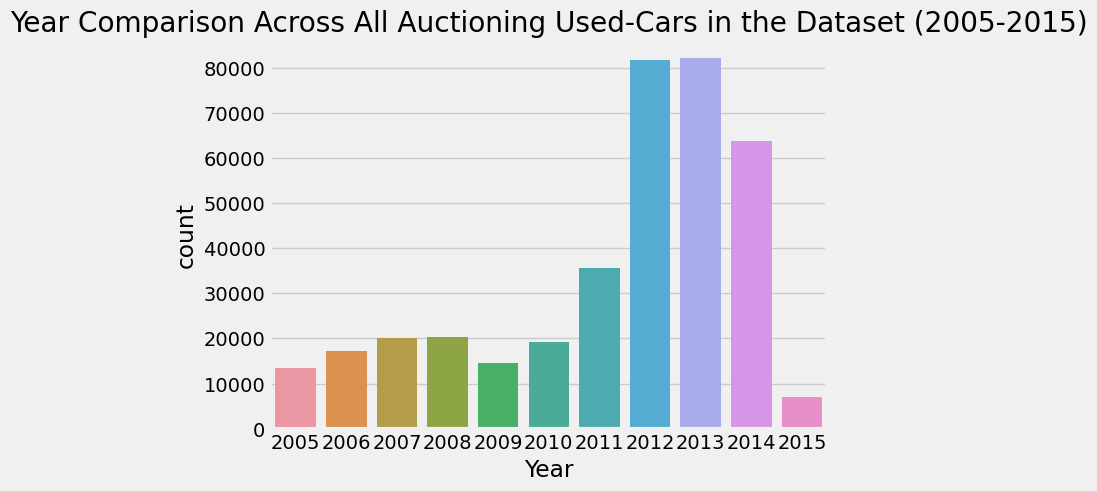

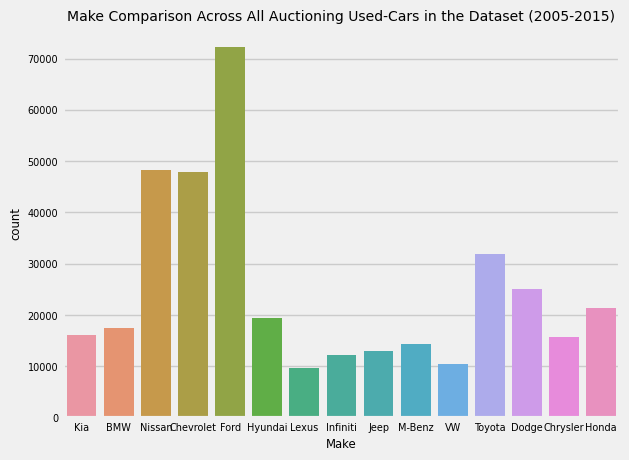

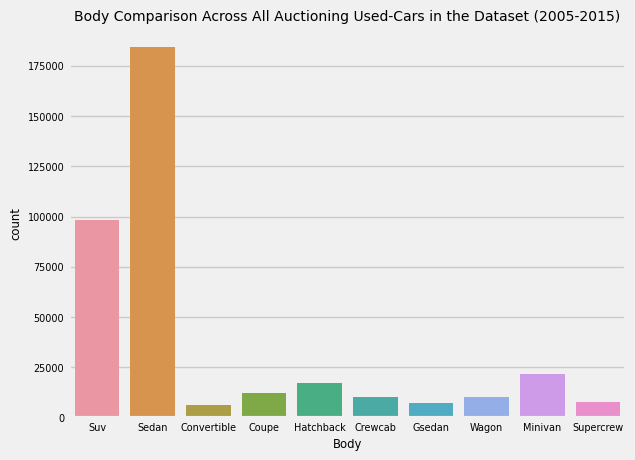

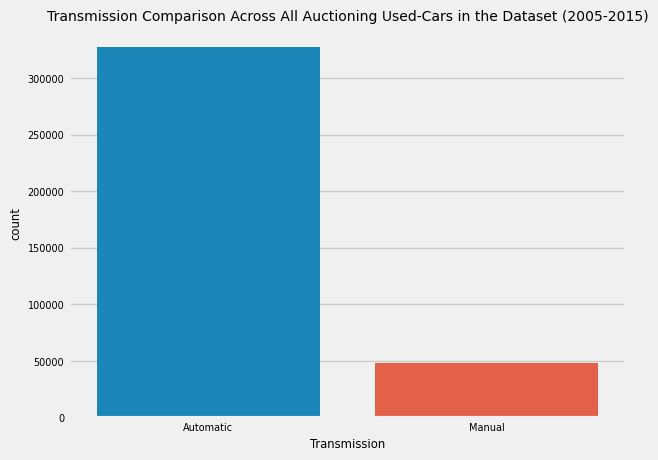

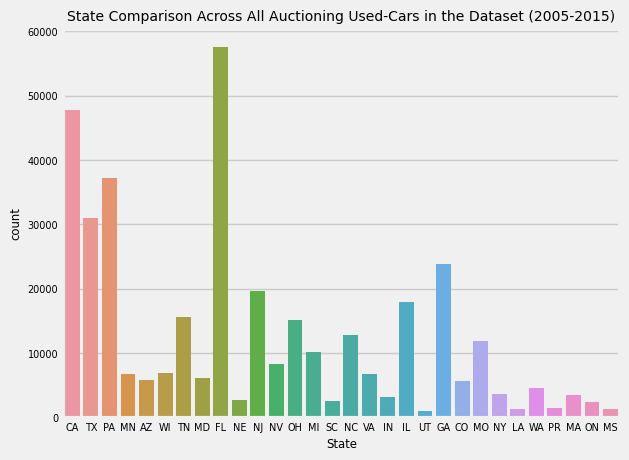

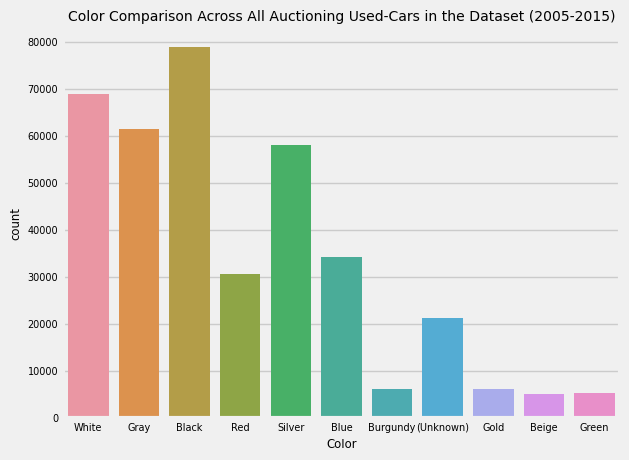

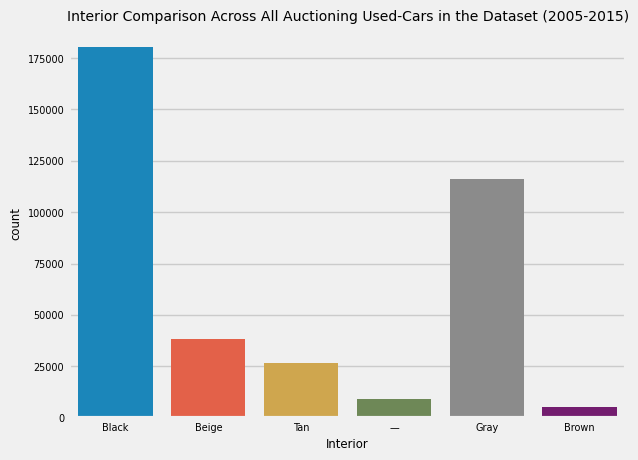

In [17]:
# Create bar graphs for descriptive statistics of the cars, figuring out how
# many fall into which group within each qualitative cateogry
def create_bar_graphs(attribute: str):
    sns.countplot(x=attribute, data=df)
    plt.title(f"{attribute} Comparison Across All Auctioning Used-Cars in the Dataset (2005-2015)")
    plt.rcParams["font.size"] = 7
    plt.show()

categorical_columns = ["Year", "Make", "Body", "Transmission", "State", "Color", "Interior"]

for col in categorical_columns:
    create_bar_graphs(col)

## Machine Learning - Model Training and Evaluation

Great, now we are onto the Machine Learning part of the blog post!

As seen while cleaning the dataset above, this dataset was more used for data science applications. However, as mentioned above, I found a way to convert this into a Machine-Learning related study. Through seeing the profit made by selling the car compared to its market-valued price, determining the return-of-investment (ROI) made on the vehicle introduces the concept of binary classification here. Thus, to account for the ROI calcuation in my dataframe, I created a new column (as shown below) by subtracting the `Selling Price` columns and the `MMR (Manheim Market Report)` columns.

In [18]:
# Convert this into a binary classification problem by separating cars based on
# if each car entry (row) made a profit or not

# First we are calculating the price sold when compared to the average MMR 
# (Manheim Market Report)
df["ROI"] = df["Selling Price"] - df["MMR"]
df

,Year,Make,Model,Trim,Body,Transmission,State,Condition,Odometer,Color,Interior,Seller,MMR,Selling Price,Sale Date,ROI
Vin,,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,White,Black,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00,1000
5xyktca69fg561319,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,White,Beige,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00,700
wba3c1c51ek116351,2014,BMW,3 series,328i SULEV,Sedan,Automatic,CA,4.5,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00,-1900
wba6b2c57ed129731,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,CA,4.3,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00,1000
1n4al3ap1fn326013,2015,Nissan,Altima,2.5 S,Sedan,Automatic,CA,1.0,5554.0,Gray,Black,Enterprise Vehicle Exchange / Tra / Rental / T...,15350,10900,2014-12-30 12:00:00,-4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wbafr1c53bc744672,2011,BMW,5 series,528i,Sedan,Automatic,FL,3.9,66403.0,White,Brown,Lauderdale Imports Ltd Bmw Pembrok Pines,20300,22800,2015-07-07 06:15:00,2500
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,Manual,IN,4.5,18255.0,Silver,Black,Avis Corporation,35300,33000,2015-07-09 07:00:00,-2300
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,Suv,Automatic,CA,4.8,50561.0,Black,Black,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00,4200


As I was curious about the range of the ROI calcuation data, I created a histogram to illustrate the ROI spread across all car models and years currently in my working dataset.

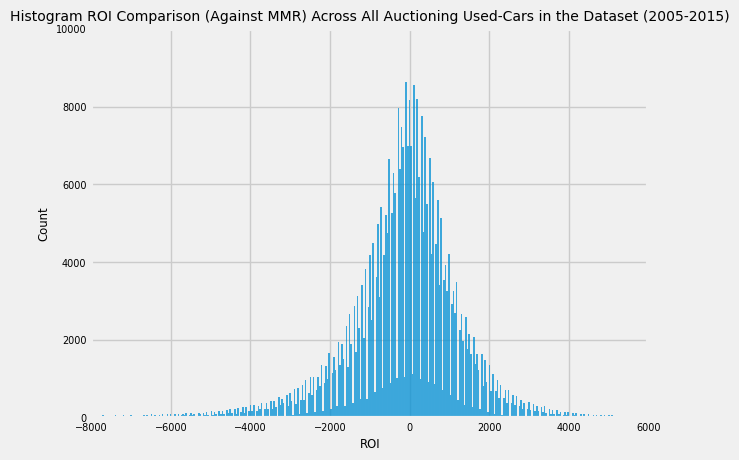

In [19]:
# Histogram plot illustrating the ROI across all of the cars
sns.histplot(df["ROI"])
plt.rcParams["font.size"] = 7
plt.title("Histogram ROI Comparison (Against MMR) Across All Auctioning Used-Cars in the Dataset (2005-2015)")
plt.xlim(-8000, 6000)
plt.ylim(0, 10000)
plt.show()

Because many of the Machine Learning algoritm functions can only take in numerical, standardized input, I decided to standardized it using True/False (for now), indiciating whether a profit was made or not. Ultimately, it does not matter what the ROI price was for each car but rather if it made a profit (positive ROI) or loss (negative or 0 ROI) at the moment of the sale. Later, I will convert the True/False values to its binary equivalent, 0 and 1.

In [20]:
# Converting to the binary classification, slowly reordering the ROI column to 
# binary 0 or 1
# Now: False (failure) and True (Success)
df["ROI"] = ((df["Selling Price"] - df["MMR"]) > 0)
df

,Year,Make,Model,Trim,Body,Transmission,State,Condition,Odometer,Color,Interior,Seller,MMR,Selling Price,Sale Date,ROI
Vin,,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,White,Black,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00,True
5xyktca69fg561319,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,White,Beige,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00,True
wba3c1c51ek116351,2014,BMW,3 series,328i SULEV,Sedan,Automatic,CA,4.5,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00,False
wba6b2c57ed129731,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,CA,4.3,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00,True
1n4al3ap1fn326013,2015,Nissan,Altima,2.5 S,Sedan,Automatic,CA,1.0,5554.0,Gray,Black,Enterprise Vehicle Exchange / Tra / Rental / T...,15350,10900,2014-12-30 12:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wbafr1c53bc744672,2011,BMW,5 series,528i,Sedan,Automatic,FL,3.9,66403.0,White,Brown,Lauderdale Imports Ltd Bmw Pembrok Pines,20300,22800,2015-07-07 06:15:00,True
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,Manual,IN,4.5,18255.0,Silver,Black,Avis Corporation,35300,33000,2015-07-09 07:00:00,False
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,Suv,Automatic,CA,4.8,50561.0,Black,Black,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00,True


Once more, before I pass my dataset over to the Machine Learning algorithms, I would like to sort all of the working car entries in my dataframe by all of its important categorical features in a hierarchy for visual reasons using the `sort_values` function - `Sale Date`, `Condition`, `Year`, `Make`, `ROI`, and `Odometer` - so that I can have a better organized picture of the final dataframe I will be working with prior to imposing any Machine Learning onto this.

In [21]:
# Sort values in the table in order by column to show a hierarchy of 
# importance between comparable attributes of Auctioning Used-Cars
# from the 2005-2015 time period
df.sort_values(by=["Sale Date", "Condition", "Year", "Make", "ROI", "Odometer"], ascending=[False, False, False, True, False, False], inplace=True)
df

,Year,Make,Model,Trim,Body,Transmission,State,Condition,Odometer,Color,Interior,Seller,MMR,Selling Price,Sale Date,ROI
Vin,,,,,,,,,,,,,,,,
1gnfc13007r166874,2007,Chevrolet,Tahoe,LT,Suv,Automatic,FL,2.3,1.0,White,Black,Autonation Ford Sanford,10450,9100,2015-07-21 02:30:00,False
3gcukrec4eg454516,2014,Chevrolet,Silverado 1500,LT,Crewcab,Manual,PA,4.9,26294.0,Red,Black,Enterprise Veh Exchange/rental,30700,29000,2015-07-14 06:30:00,False
1ftfw1ef0dfb68283,2013,Ford,F-150,XLT,Supercrew,Automatic,MS,4.4,47046.0,White,Gray,The Hertz Corporation,24800,24600,2015-07-14 06:30:00,False
1gc1kxcg1cf125803,2012,Chevrolet,Silverado 2500hd,LT,Crewcab,Automatic,TX,4.4,89312.0,Red,Black,Donlen Corporation,22200,22800,2015-07-14 06:30:00,True
1ftfw1ef6dkf58506,2013,Ford,F-150,XL,Supercrew,Automatic,TX,4.1,52992.0,White,Gray,Enterprise Fleet Management Exchange,24200,18100,2015-07-14 06:30:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kmhfc46f26a137010,2006,Hyundai,Azera,SE,Sedan,Automatic,SC,2.7,130948.0,White,Beige,Automobile Acceptance Corp,4575,4100,2014-01-01 09:15:00,False
1g1pg5sc0c7199389,2012,Chevrolet,Cruze,2LT,Sedan,Automatic,SC,2.5,50457.0,White,Black,The Hertz Corporation,9750,8900,2014-01-01 09:15:00,False
3gnec12z96g177687,2006,Chevrolet,Avalanche,1500 LS,Crewcab,Automatic,SC,2.1,99247.0,Black,Gray,Pra Receivables Management Llc,7500,6800,2014-01-01 09:15:00,False


With all of the entries sorted into its final positions in the dataframe, I found no need for certain categorical columns to be considered in the Machine Learning algorithms: `Seller`, `MMR`, `Selling Price`, `Trim`, `State`, `Model`, and `Sale Date`. Thus, I dropped them from my working dataframe to consolidate the dataset to those columns that I found relevant for car entry evaluation.

In [22]:
# Drop these purely categorical columns (not needed in Machine Learning algorithms
# which require only numerical input)
df.drop(["Seller", "MMR", "Selling Price", 
         "Trim", "State", "Model", "Sale Date"], axis=1, inplace=True)
df

,Year,Make,Body,Transmission,Condition,Odometer,Color,Interior,ROI
Vin,,,,,,,,,
1gnfc13007r166874,2007,Chevrolet,Suv,Automatic,2.3,1.0,White,Black,False
3gcukrec4eg454516,2014,Chevrolet,Crewcab,Manual,4.9,26294.0,Red,Black,False
1ftfw1ef0dfb68283,2013,Ford,Supercrew,Automatic,4.4,47046.0,White,Gray,False
1gc1kxcg1cf125803,2012,Chevrolet,Crewcab,Automatic,4.4,89312.0,Red,Black,True
1ftfw1ef6dkf58506,2013,Ford,Supercrew,Automatic,4.1,52992.0,White,Gray,False
...,...,...,...,...,...,...,...,...,...
kmhfc46f26a137010,2006,Hyundai,Sedan,Automatic,2.7,130948.0,White,Beige,False
1g1pg5sc0c7199389,2012,Chevrolet,Sedan,Automatic,2.5,50457.0,White,Black,False
3gnec12z96g177687,2006,Chevrolet,Crewcab,Automatic,2.1,99247.0,Black,Gray,False


As described before, the Machine Learning algoritm functions can only take in numerical, standardized input, so I decided to standardized the all of the rest of the categorical columns used in the evaluation of these used-car entries - `ROI`, `Transmission`, `Exterior Color`, `Matching Colors for Car Exterior and Interior`, `Make`, and `Body` - to numerical inputs using standard index mapping assignment in Python.

In [23]:
# Convert all necessary columns to an associated numerical value so that
# they may be accepted as quantiative input to train the Machine Learning model
df = df.rename(columns={"Color": "Exterior Color", "Interior": "Matching Colors for Car Exterior and Interior"})
df["Matching Colors for Car Exterior and Interior"] = (df["Matching Colors for Car Exterior and Interior"] == df["Exterior Color"])

df["ROI"] = df["ROI"].map({True: 1, False: 0}).astype(int)
df["Transmission"] = df["Transmission"].map({"Automatic": 0, "Manual": 1}).astype(int)
df["Matching Colors for Car Exterior and Interior"] = df["Matching Colors for Car Exterior and Interior"].map({True: 1, False: 0}).astype(int)
df["Exterior Color"] = df["Exterior Color"].map({"Black": 0, "White": 1, "Gray": 2, "Silver": 3, "Blue": 4, "Red": 5, "Gold": 6, "Burgundy": 7, "Beige": 8, "Green": 9, "(Unknown)": 10}).astype(int)
df["Make"] = df["Make"].map({"Ford": 0, "Nissan": 1, "Chevrolet": 2, "Toyota": 3, "Dodge": 4, "Honda": 5, "Hyundai": 6, "BMW": 7, "Kia": 8, "Chrysler": 9, "M-Benz": 10, "Jeep": 11, "Infiniti": 12, 
    "VW": 13, "Lexus": 14}).astype(int)
df["Body"] = df["Body"].map({"Sedan": 0, "Suv": 1, "Minivan": 2, "Hatchback": 3, "Coupe": 4, "Crewcab": 5, "Wagon": 6, "Supercrew": 7, "Convertible": 8, "Gsedan": 9}).astype(int)
df

,Year,Make,Body,Transmission,Condition,Odometer,Exterior Color,Matching Colors for Car Exterior and Interior,ROI
Vin,,,,,,,,,
1gnfc13007r166874,2007,2,1,0,2.3,1.0,1,0,0
3gcukrec4eg454516,2014,2,5,1,4.9,26294.0,5,0,0
1ftfw1ef0dfb68283,2013,0,7,0,4.4,47046.0,1,0,0
1gc1kxcg1cf125803,2012,2,5,0,4.4,89312.0,5,0,1
1ftfw1ef6dkf58506,2013,0,7,0,4.1,52992.0,1,0,0
...,...,...,...,...,...,...,...,...,...
kmhfc46f26a137010,2006,6,0,0,2.7,130948.0,1,0,0
1g1pg5sc0c7199389,2012,2,0,0,2.5,50457.0,1,0,0
3gnec12z96g177687,2006,2,5,0,2.1,99247.0,0,0,0


As all of the data in the working dataframe is now numerical, I wanted to preliminary-wise see the quantifiable correlation between the `ROI` columns and the rest in the dataset. Thus, using the `corr` function for dataframes with the `ROI` column, I created a heatmap and bar-graph visualizing the constrast between each car entries' attribute columns and its ROI value.

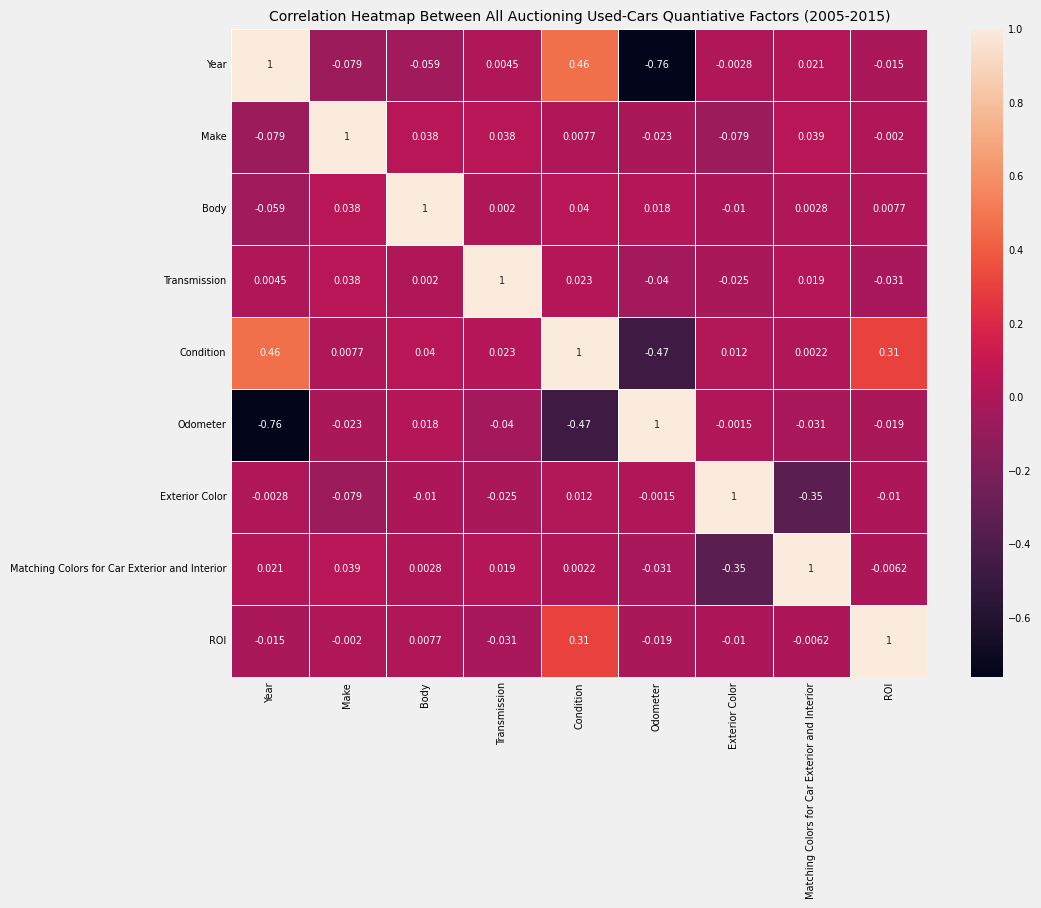

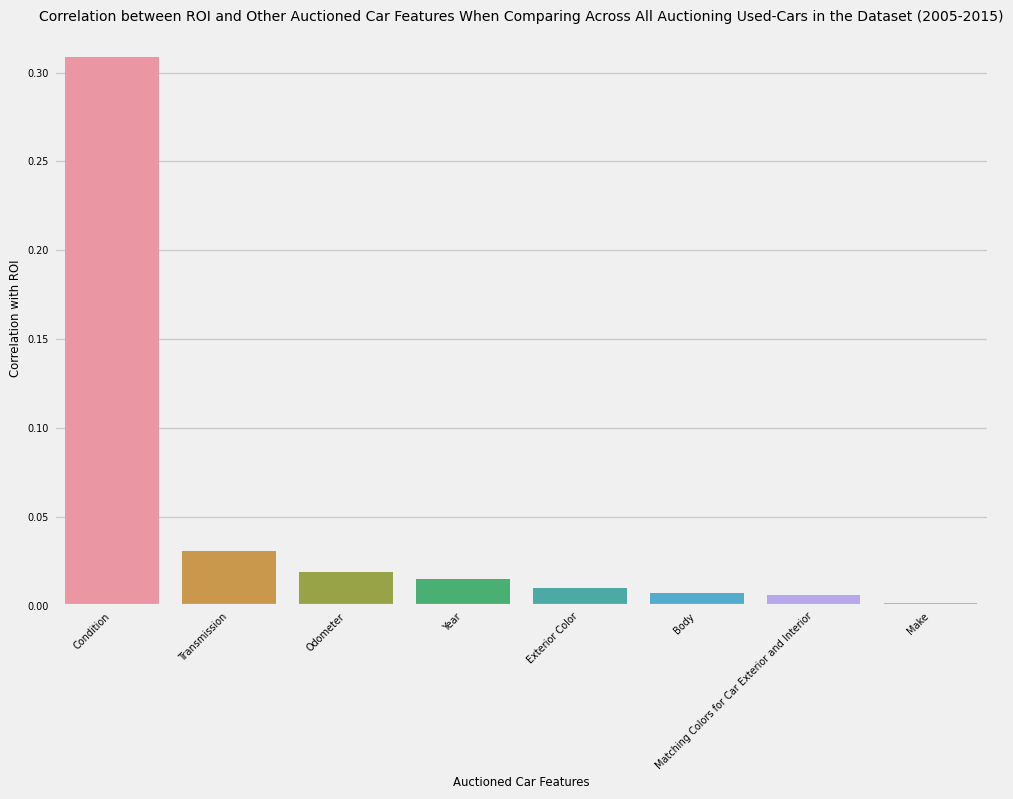

In [24]:
# Correlation heatmap to quantify relationships between auctioning used-car
# attributes
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.title("Correlation Heatmap Between All Auctioning Used-Cars Quantiative Factors (2005-2015)")
plt.show()

# Correlation bar graph between ROI and all other auctioning used-car
# attributes
target_corr = df.corr()["ROI"].abs().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.index[1:], y=target_corr.values[1:])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Auctioned Car Features")
plt.ylabel("Correlation with ROI")
plt.title("Correlation between ROI and Other Auctioned Car Features When Comparing Across All Auctioning Used-Cars in the Dataset (2005-2015)")
plt.tight_layout()
plt.show()

Since the dataframe is now properly cleaned, sorted, and integer-mapped by this point, I had split the respective dataframe into the train and test datasets for the Machine Learning model with 80% going to the training dataset and the last 20% going to the test dataset. Fortunately, because order of the data sequentially does not matter here, I was able to utilize the `train_test_split` function for shuffling and randomization, making the future-generated Machine Learning model more unpredictable but also more objective in its returned model results. 

Note that here I also used a `Pipeline` object from the `scikit-learn` package as well as the `MinMaxScaler` and the `StandardScaler` classes. On one hand, the `MinMaxScaler` class is useful for scaling columns to a specific range, usually between [0, 1], to maintain consistency. On the other hand, the `StandardScaler` class is useful for apply Z-score normalization / transformation on the data to avoid sensivite-prone Machine Learning algorithms which require appropriate scaling of the features within its trained dataset. As I learned from online, this `Pipeline` object is necesary to ensure appropriate preprocessing just before the dataset is passed to the Machine Learning model for training and later evaluation. 

In [25]:
# Configuring the Machine Learning Tensorflow Model by placing all other columns into the x
# axis and ROI column into the y-axis
X = df.drop(["ROI"], axis=1)
y = df["ROI"]

print("X Shape:", X.shape)
print("Y Shape:", y.shape)

pipeline = Pipeline([
    ("min_max_scaler", MinMaxScaler()),
    ("std_scaler", StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)
X_train_copy = X_train.copy()
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

X Shape: (375113, 8)
Y Shape: (375113,)


Whenever the Machine Learning model is fitted, it would be a good time to evaluate the effectiveness of my model. Thus, I will calculate metrics (as shown below) such as `Precision Score`, `ROC-AUC (Receiver Operating Characteristic (Curve) - Area Under the Curve) Score`, `Precision Score`, `F1 Score`, `Recall Score`, and the `Confusion Matrix`. Thus, in the following code snippet, I have written a function called `print_score` to print out these statistics as well as a corresponding visualization of the confusion matrix. This function will be invoked after each type of classification model has been discussed to evaluate each one's effectiveness objectively.

In [26]:
def print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True):
    if train == True:
        y_pred = model.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_true=y_train, y_pred=y_pred, output_dict=True, zero_division=0))
        
        # Compute and output statistics for Precision, Accuracy, and ROC AUC Scores as well as the Classifcation Report
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_train, y_train_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        
        # Calculate and output Precision, Recall, F1-Score, and Confusion Matrix
        precision, recall, f1_score = (0, 0, 0)
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_true=y_train, y_pred=y_pred, average='binary')
        model_performance_metrics: [str] = ["Precision", "Recall", "F1_Score"]
        model_performance_metrics_values: [float] = [precision, recall, f1_score]
        print("_______________________________________________")
        print(f"Precision Score: {precision * 100:.2f}%")
        print("_______________________________________________")
        print(f"Recall Score: {recall * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {f1_score * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_pred)}") 

        plt.figure(figsize=(10, 8))
        plt.bar(model_performance_metrics, model_performance_metrics_values, color=["blue", "green", "orange"])
        plt.xlabel("Metrics")
        plt.ylabel("Score")
        plt.title("Recommendation Model Evaluation Metrics -- Training Data")
        plt.show()
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix for Training Data")
        plt.show()
    
    elif train == False:
        y_pred = model.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_true=y_test, y_pred=y_pred, output_dict=True, zero_division=0))
        
        # Compute and output statistics for Precision, Accuracy, and ROC AUC Scores as well as the Classifcation Report
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_test_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        
        # Calculate and output Precision, Recall, F1-Score, and Confusion Matrix
        precision, recall, f1_score = (0, 0, 0)
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_true=y_test, y_pred=y_pred, average='binary')
        model_performance_metrics: [str] = ["Precision", "Recall", "F1_Score"]
        model_performance_metrics_values: [float] = [precision, recall, f1_score]
        print("_______________________________________________")
        print(f"Precision Score: {precision * 100:.2f}%")
        print("_______________________________________________")
        print(f"Recall Score: {recall * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {f1_score * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")  

        plt.figure(figsize=(10, 8))
        plt.bar(model_performance_metrics, model_performance_metrics_values, color=["blue", "green", "orange"])
        plt.xlabel("Metrics")
        plt.ylabel("Score")
        plt.title("Recommendation Model Evaluation Metrics -- Testing Data")
        plt.show() 
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix for Testing Data")
        plt.show()

Now, we are finally at the Machine Learning classification portion. To reinforce my understanding of the different methodologies covered at the beginning of this course with regards to different ways of doing Machine-Learing classification, I am going to constrast all four of the main classification methods covered in this course: `LogisticRegression`, `KNeighborsClassifier`, `RandomForestClassifier`, and the `DecisionTreeClassifier`, comparing all of them against all of the following metrics evaluated in the `print_score` function to see which method is the most representative and encompassing of the most-accurately depicting my working dataset of Auctioned Used-Cars.

First, I analyzed the `LogisticRegression` Classification algorithm by fitting, estimating the probability of the sample for each class in the model using the `predict_proba` function, and printing out the appropriate metrics and visualization of the confusion matrix using the `print_score` helper function created earlier in the code snippets above.

Train Result:
Accuracy Score: 64.88%
_______________________________________________
ROC AUC Score: 70.70%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.669965       0.624459  0.648752       0.647212   
recall          0.671381       0.622954  0.648752       0.647168   
f1-score        0.670672       0.623706  0.648752       0.647189   
support    159863.000000  140227.000000  0.648752  300090.000000   

            weighted avg  
precision       0.648701  
recall          0.648752  
f1-score        0.648726  
support    300090.000000  
_______________________________________________
Precision Score: 62.45%
_______________________________________________
Recall Score: 62.30%
_______________________________________________
F1 Score: 62.37%
_______________________________________________
Confusion Matrix:
[[107329  52534]
 [ 52872  87355]]


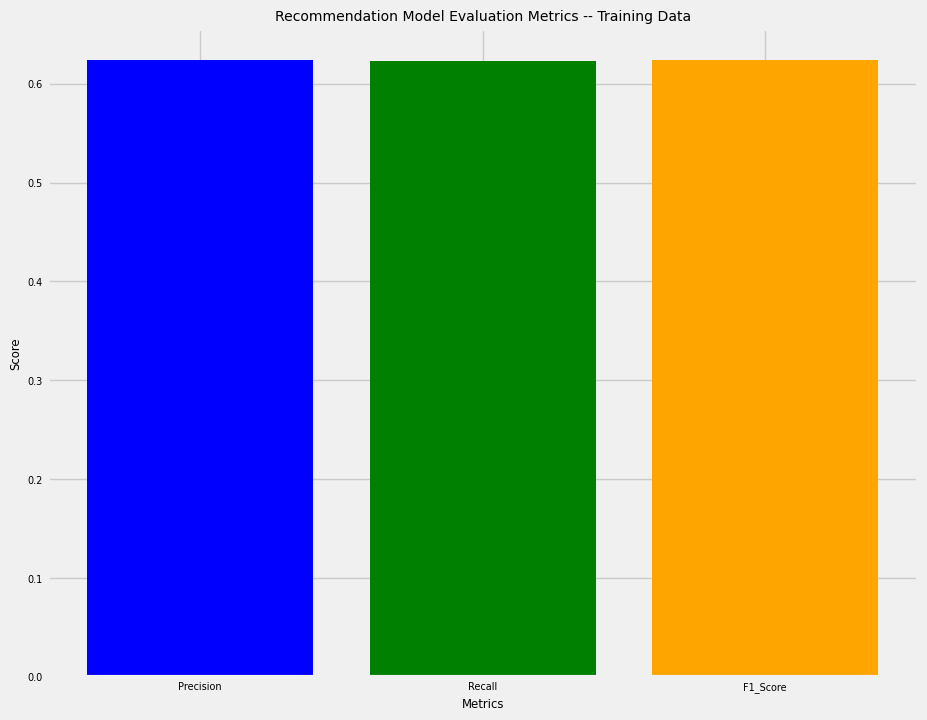

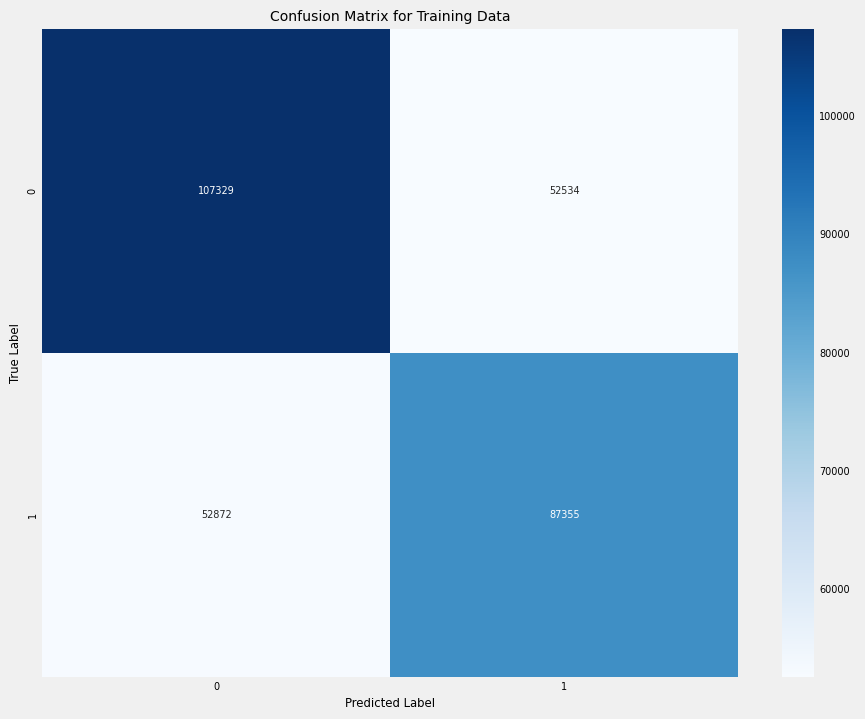

Test Result:
Accuracy Score: 64.44%
_______________________________________________
ROC AUC Score: 70.35%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.666450      0.619177  0.644376      0.642813      0.644377
recall         0.666417      0.619212  0.644376      0.642814      0.644376
f1-score       0.666433      0.619194  0.644376      0.642814      0.644376
support    39993.000000  35030.000000  0.644376  75023.000000  75023.000000
_______________________________________________
Precision Score: 61.92%
_______________________________________________
Recall Score: 61.92%
_______________________________________________
F1 Score: 61.92%
_______________________________________________
Confusion Matrix:
[[26652 13341]
 [13339 21691]]


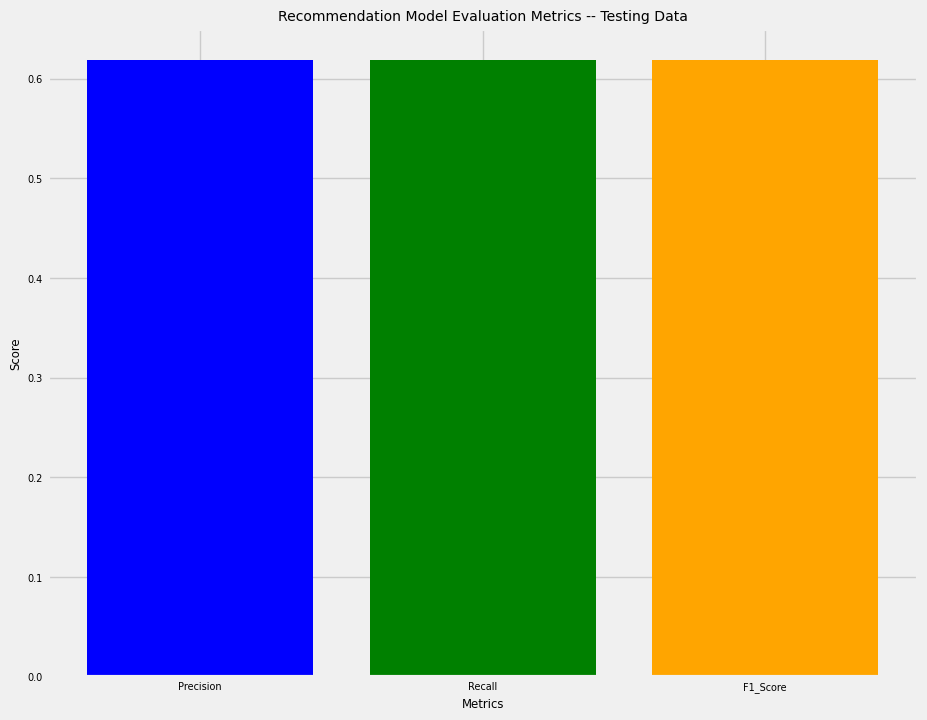

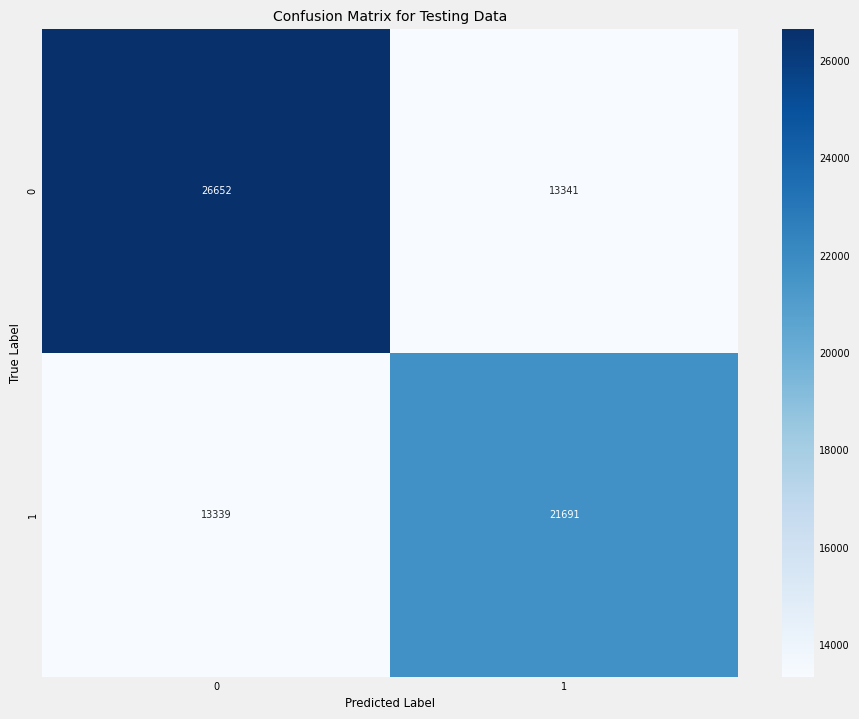

In [27]:
# Utilize the X_train and X_test Datasets to apply it towards LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_train_prob = log_reg.predict_proba(X_train)[:, 1]
y_test_prob = log_reg.predict_proba(X_test)[:, 1]

print_score(log_reg, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

Second, I analyzed the `KNeighborsClassifier` Classification algorithm by fitting, estimating the probability of the sample for each class in the model using the `predict_proba` function, and printing out the appropriate metrics and visualization of the confusion matrix using the `print_score` helper function created earlier in the code snippets above.

Train Result:
Accuracy Score: 74.77%
_______________________________________________
ROC AUC Score: 82.71%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.761243       0.731942  0.747666       0.746592   
recall          0.766838       0.725809  0.747666       0.746323   
f1-score        0.764030       0.728863  0.747666       0.746446   
support    159863.000000  140227.000000  0.747666  300090.000000   

            weighted avg  
precision       0.747551  
recall          0.747666  
f1-score        0.747597  
support    300090.000000  
_______________________________________________
Precision Score: 73.19%
_______________________________________________
Recall Score: 72.58%
_______________________________________________
F1 Score: 72.89%
_______________________________________________
Confusion Matrix:
[[122589  37274]
 [ 38449 101778]]


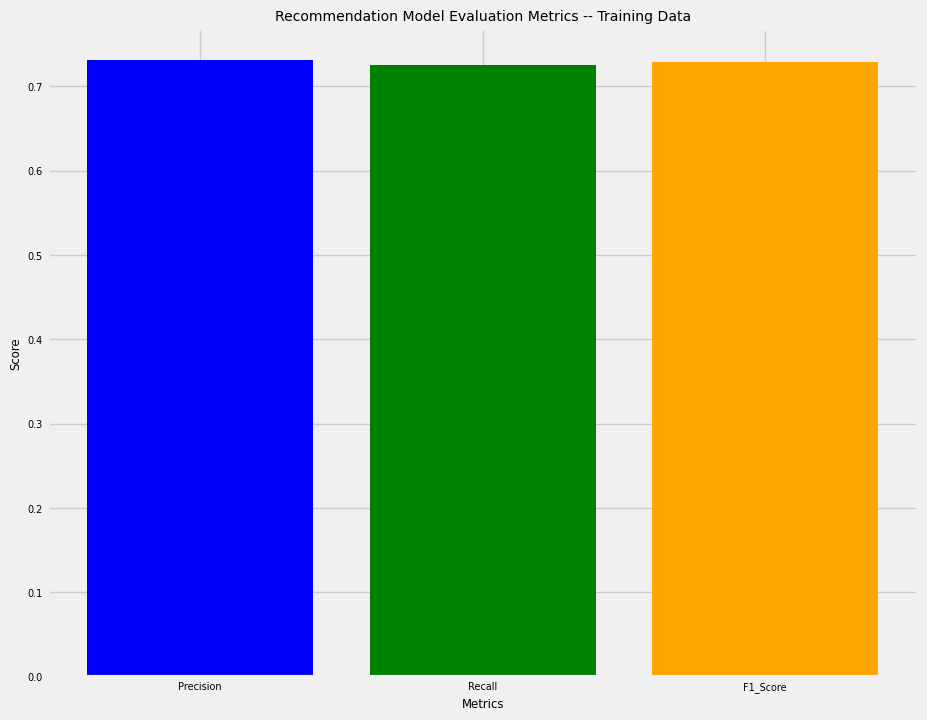

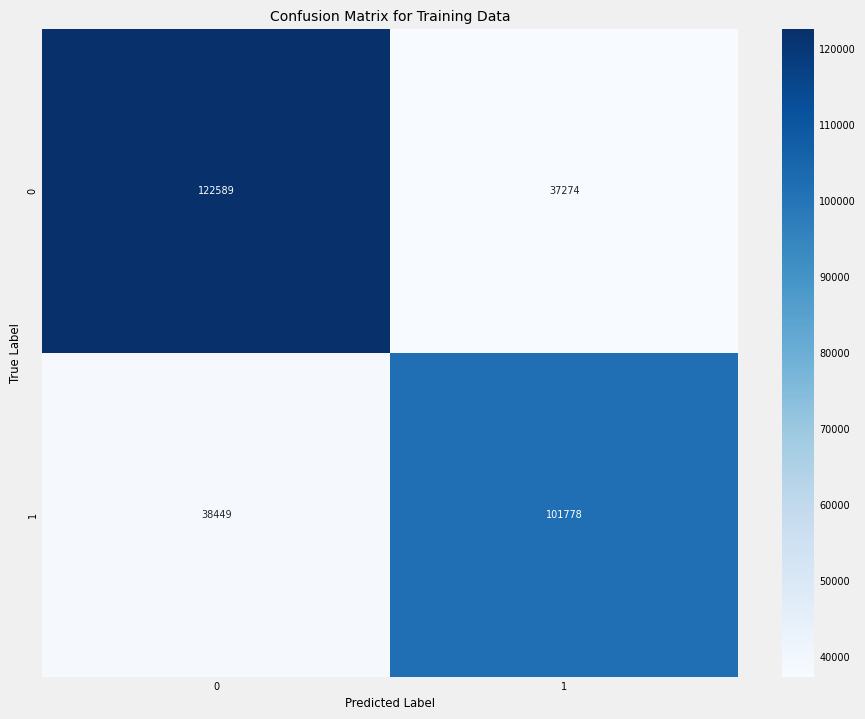

Test Result:
Accuracy Score: 61.93%
_______________________________________________
ROC AUC Score: 65.97%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.642210      0.592868  0.619303      0.617539      0.619171
recall         0.645438      0.589466  0.619303      0.617452      0.619303
f1-score       0.643820      0.591162  0.619303      0.617491      0.619233
support    39993.000000  35030.000000  0.619303  75023.000000  75023.000000
_______________________________________________
Precision Score: 59.29%
_______________________________________________
Recall Score: 58.95%
_______________________________________________
F1 Score: 59.12%
_______________________________________________
Confusion Matrix:
[[25813 14180]
 [14381 20649]]


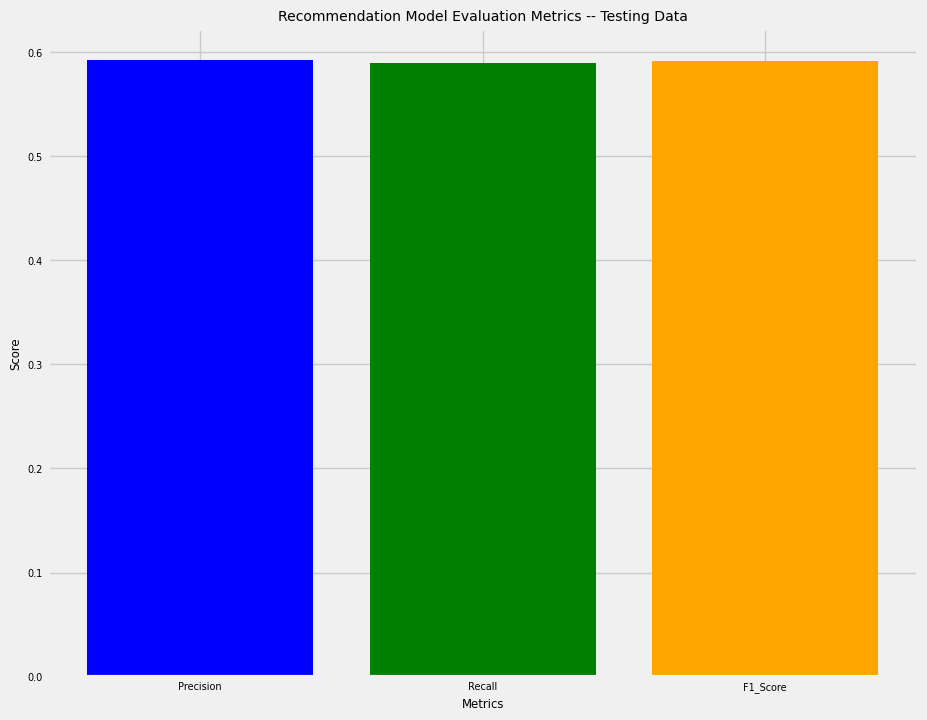

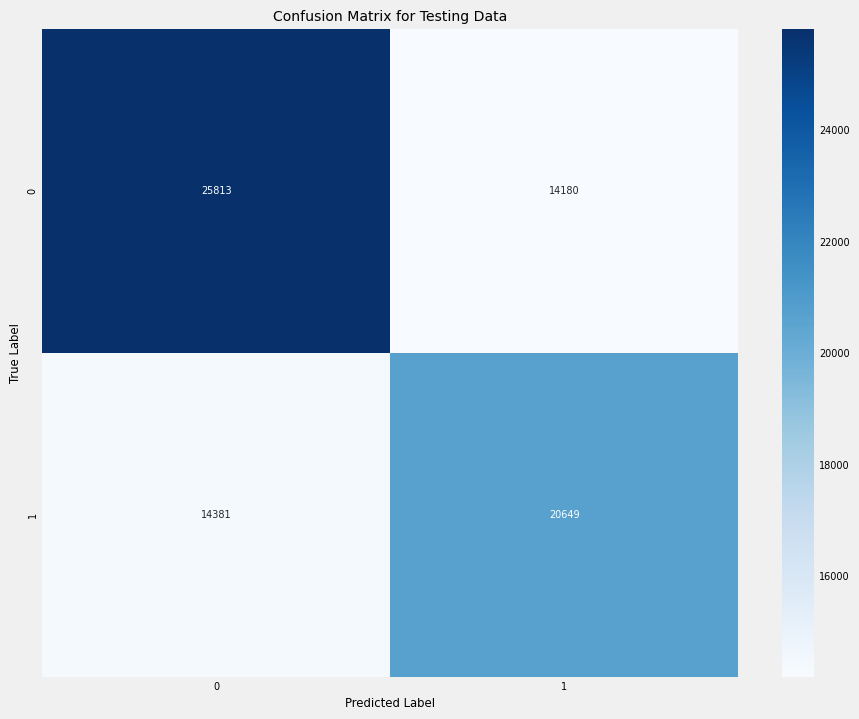

In [28]:
# Utilize the X_train and X_test Datasets to apply it towards KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_train_prob = knn_classifier.predict_proba(X_train)[:, 1]
y_test_prob = knn_classifier.predict_proba(X_test)[:, 1]

print_score(knn_classifier, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

Third, I analyzed the `RandomForestClassifier` Classification algorithm by fitting, estimating the probability of the sample for each class in the model using the `predict_proba` function, and printing out the appropriate metrics and visualization of the confusion matrix using the `print_score` helper function created earlier in the code snippets above.

Train Result:
Accuracy Score: 99.99%
_______________________________________________
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  weighted avg
precision       0.999900       0.999836   0.99987       0.999868       0.99987
recall          0.999856       0.999886   0.99987       0.999871       0.99987
f1-score        0.999878       0.999861   0.99987       0.999869       0.99987
support    159863.000000  140227.000000   0.99987  300090.000000  300090.00000
_______________________________________________
Precision Score: 99.98%
_______________________________________________
Recall Score: 99.99%
_______________________________________________
F1 Score: 99.99%
_______________________________________________
Confusion Matrix:
[[159840     23]
 [    16 140211]]


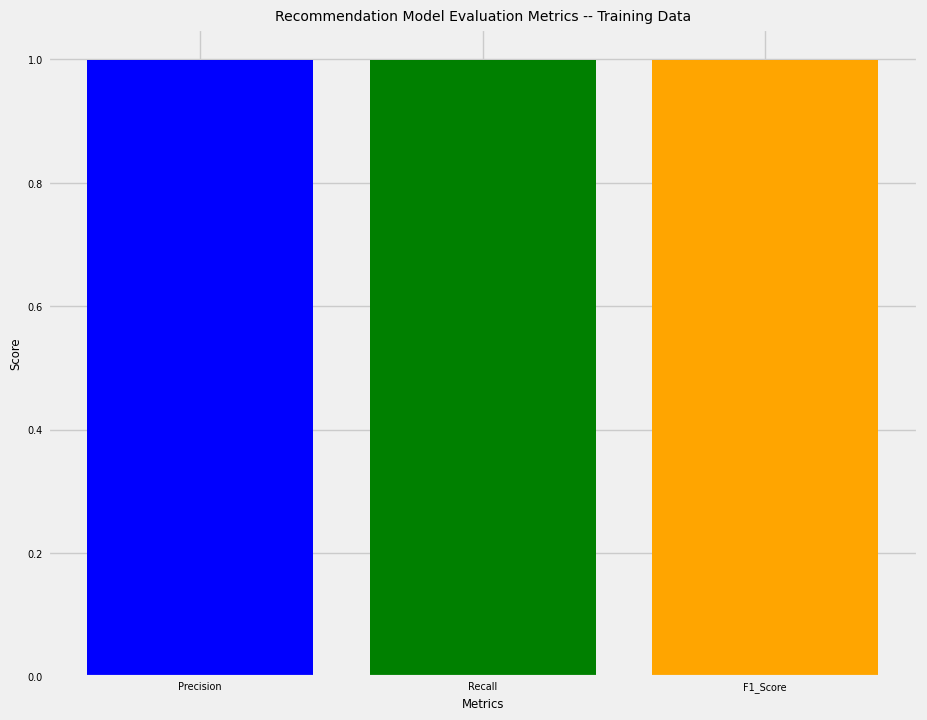

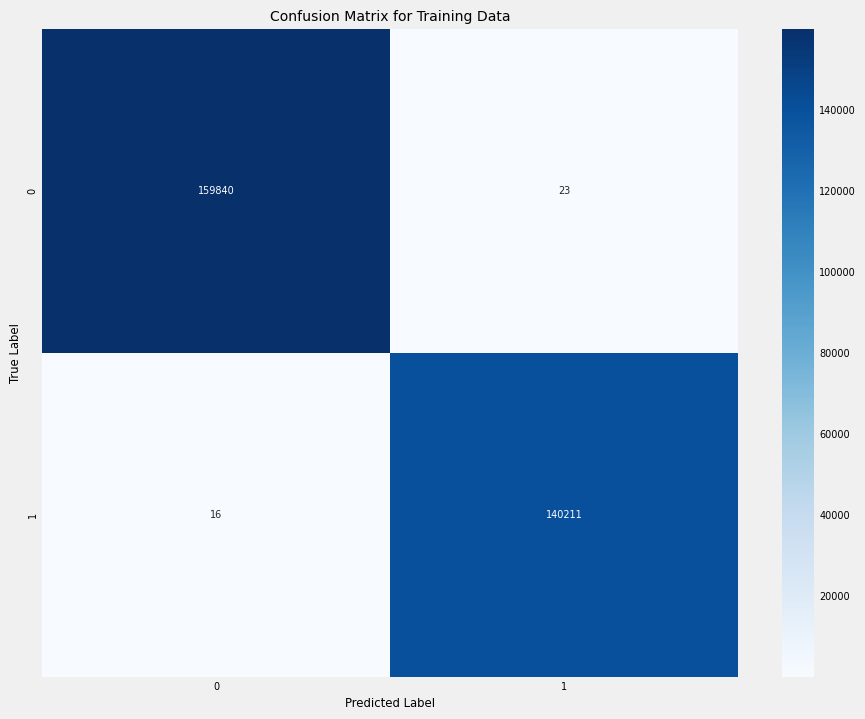

Test Result:
Accuracy Score: 62.19%
_______________________________________________
ROC AUC Score: 67.23%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.642706      0.597257  0.621943      0.619982      0.621485
recall         0.654840      0.584385  0.621943      0.619612      0.621943
f1-score       0.648716      0.590751  0.621943      0.619734      0.621651
support    39993.000000  35030.000000  0.621943  75023.000000  75023.000000
_______________________________________________
Precision Score: 59.73%
_______________________________________________
Recall Score: 58.44%
_______________________________________________
F1 Score: 59.08%
_______________________________________________
Confusion Matrix:
[[26189 13804]
 [14559 20471]]


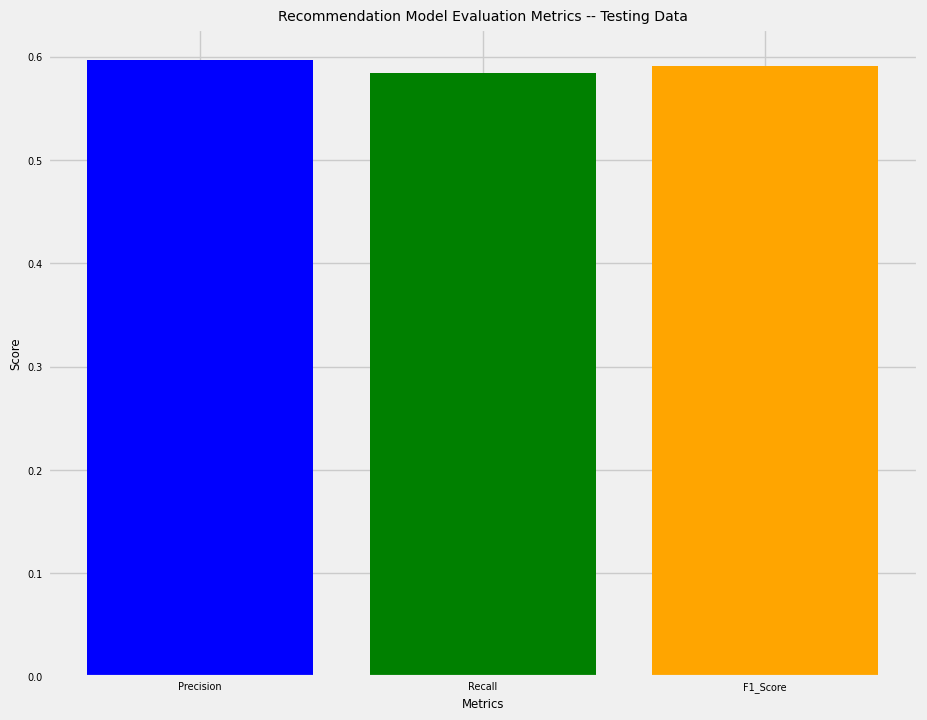

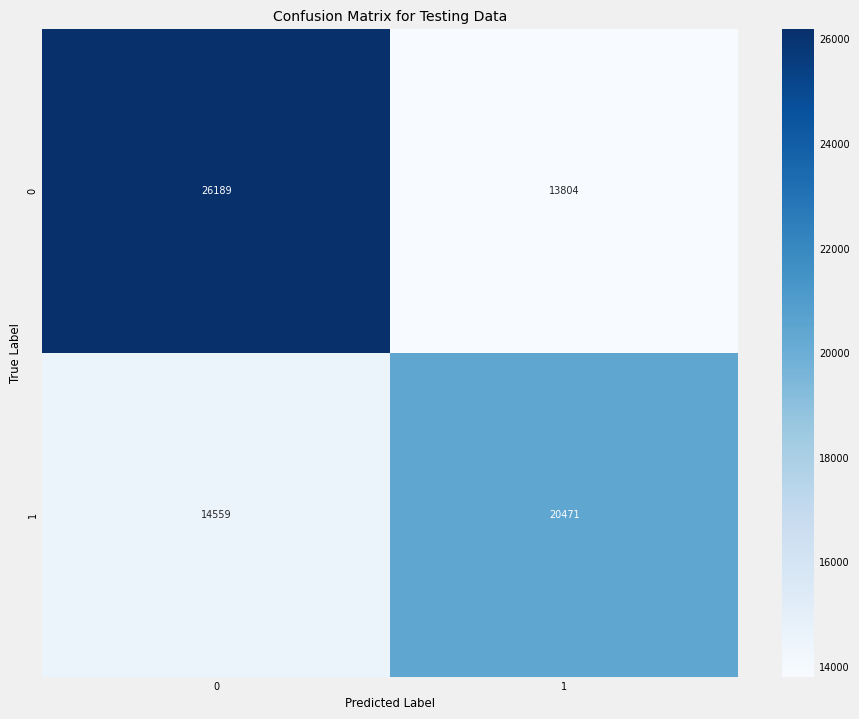

In [29]:
# Utilize the X_train and X_test Datasets to apply it towards RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators= 100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_train_prob = rf_classifier.predict_proba(X_train)[:, 1]
y_test_prob = rf_classifier.predict_proba(X_test)[:, 1]

print_score(rf_classifier, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
print_score(rf_classifier, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

For the Random-Forest Classification, I wanted to create an additional visualization seeing what categorical columns were most correlated in predicting the `ROI` column. Thus, I made a bar plot to illustrate and map each categorical relationship's correlation as shown below.

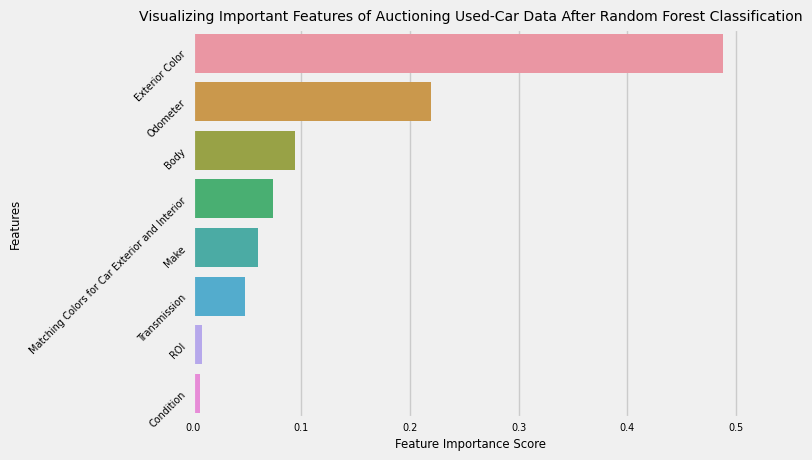

In [30]:
# Creates a visualization for the Random-Forest Classifier data
rf_visualization = pd.Series(rf_classifier.feature_importances_, index=df.columns.tolist()[1:]).sort_values(ascending=False)
sns.barplot(x=rf_visualization, y=rf_visualization.index)
plt.xlabel("Feature Importance Score")
plt.yticks(rotation=45, ha="right")
plt.ylabel("Features")
plt.title("Visualizing Important Features of Auctioning Used-Car Data After Random Forest Classification")
plt.show()

Lastly, I analyzed the `DecisionTreeClassifier` Classification algorithm by fitting, estimating the probability of the sample for each class in the model using the `predict_proba` function, and printing out the appropriate metrics and visualization of the confusion matrix using the `print_score` helper function created earlier in the code snippets above.

Train Result:
Accuracy Score: 64.07%
_______________________________________________
ROC AUC Score: 68.89%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.652885       0.624744  0.640704       0.638814   
recall          0.695101       0.578690  0.640704       0.636896   
f1-score        0.673332       0.600836  0.640704       0.637084   
support    159863.000000  140227.000000  0.640704  300090.000000   

            weighted avg  
precision       0.639735  
recall          0.640704  
f1-score        0.639456  
support    300090.000000  
_______________________________________________
Precision Score: 62.47%
_______________________________________________
Recall Score: 57.87%
_______________________________________________
F1 Score: 60.08%
_______________________________________________
Confusion Matrix:
[[111121  48742]
 [ 59079  81148]]


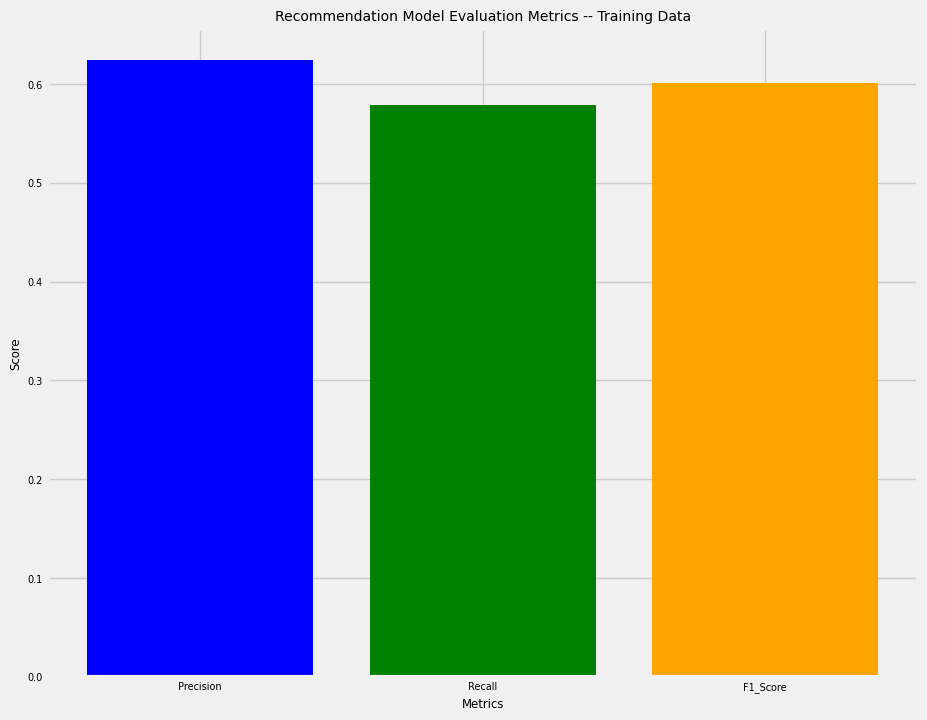

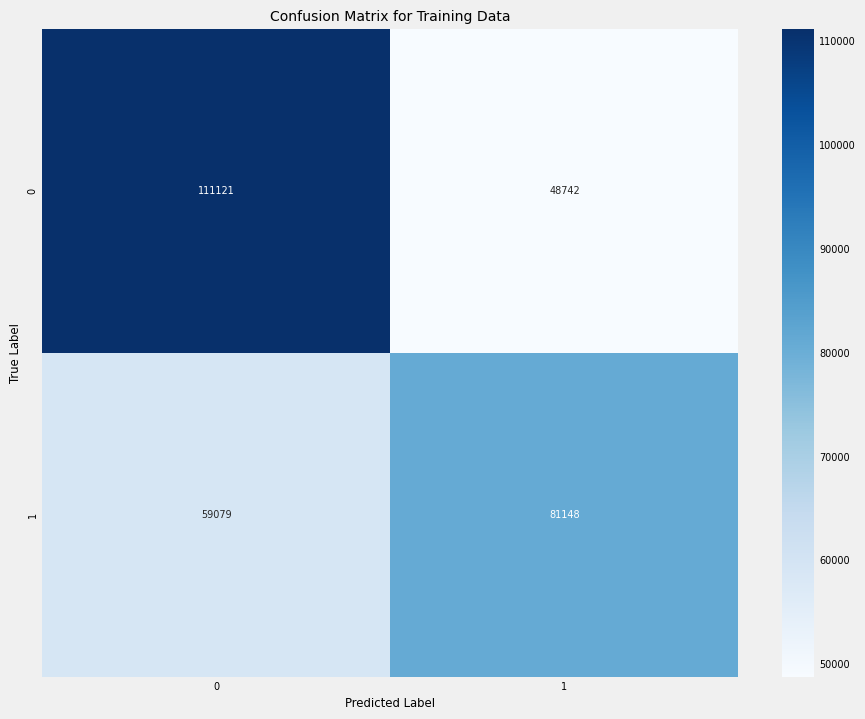

Test Result:
Accuracy Score: 63.80%
_______________________________________________
ROC AUC Score: 68.63%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.651094      0.620869  0.637978      0.635981      0.636981
recall         0.691371      0.577020  0.637978      0.634195      0.637978
f1-score       0.670628      0.598142  0.637978      0.634385      0.636783
support    39993.000000  35030.000000  0.637978  75023.000000  75023.000000
_______________________________________________
Precision Score: 62.09%
_______________________________________________
Recall Score: 57.70%
_______________________________________________
F1 Score: 59.81%
_______________________________________________
Confusion Matrix:
[[27650 12343]
 [14817 20213]]


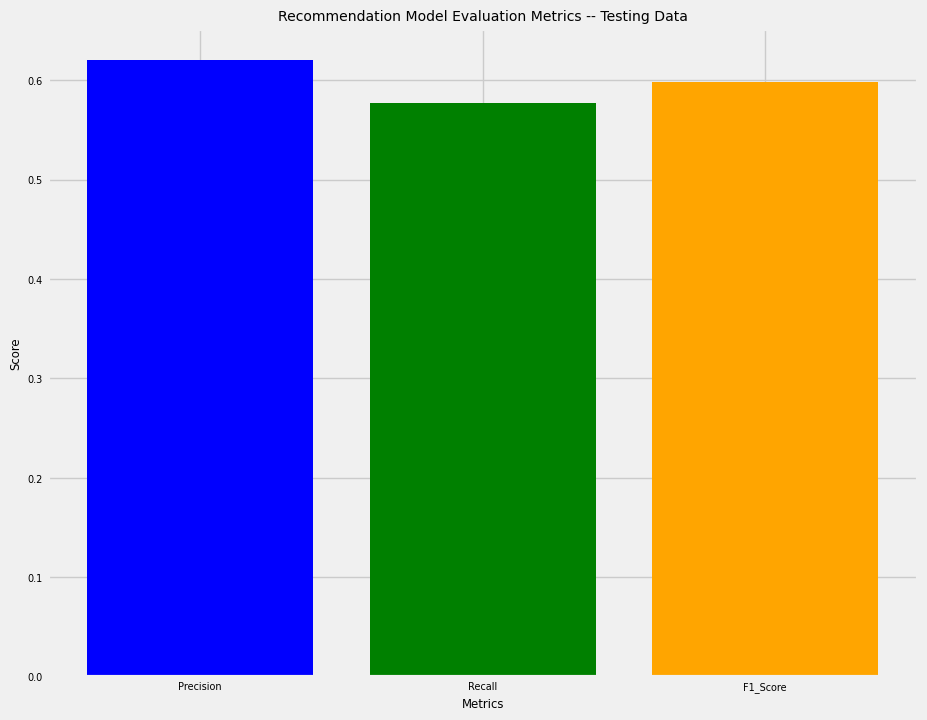

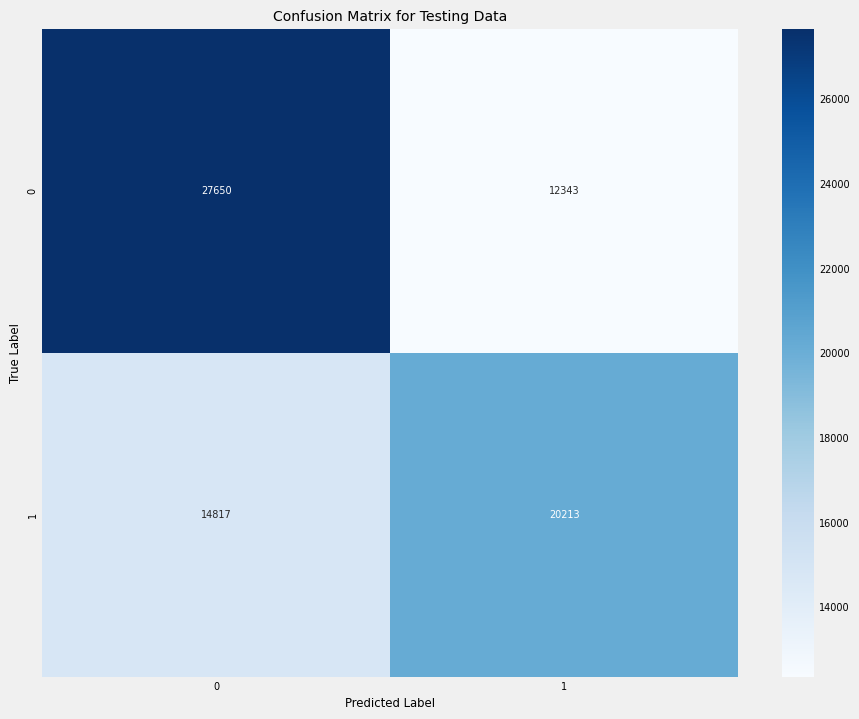

In [31]:
# Utilize the X_train and X_test Datasets to apply it towards DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)
y_train_prob = dt_classifier.predict_proba(X_train)[:, 1]
y_test_prob = dt_classifier.predict_proba(X_test)[:, 1]

print_score(dt_classifier, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
print_score(dt_classifier, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

For the Random-Forest Classification, I wanted to create an additional visualization seeing what categorical columns were most correlated in predicting the `ROI` column. Thus, I made a bar plot to illustrate and map each categorical relationship's correlation as shown below.

Similar to the Random-Forest Classification, I wanted to create an additional visualization to illustrate a portion of the Decision-Tree using the `plot_tree` function as shown below.

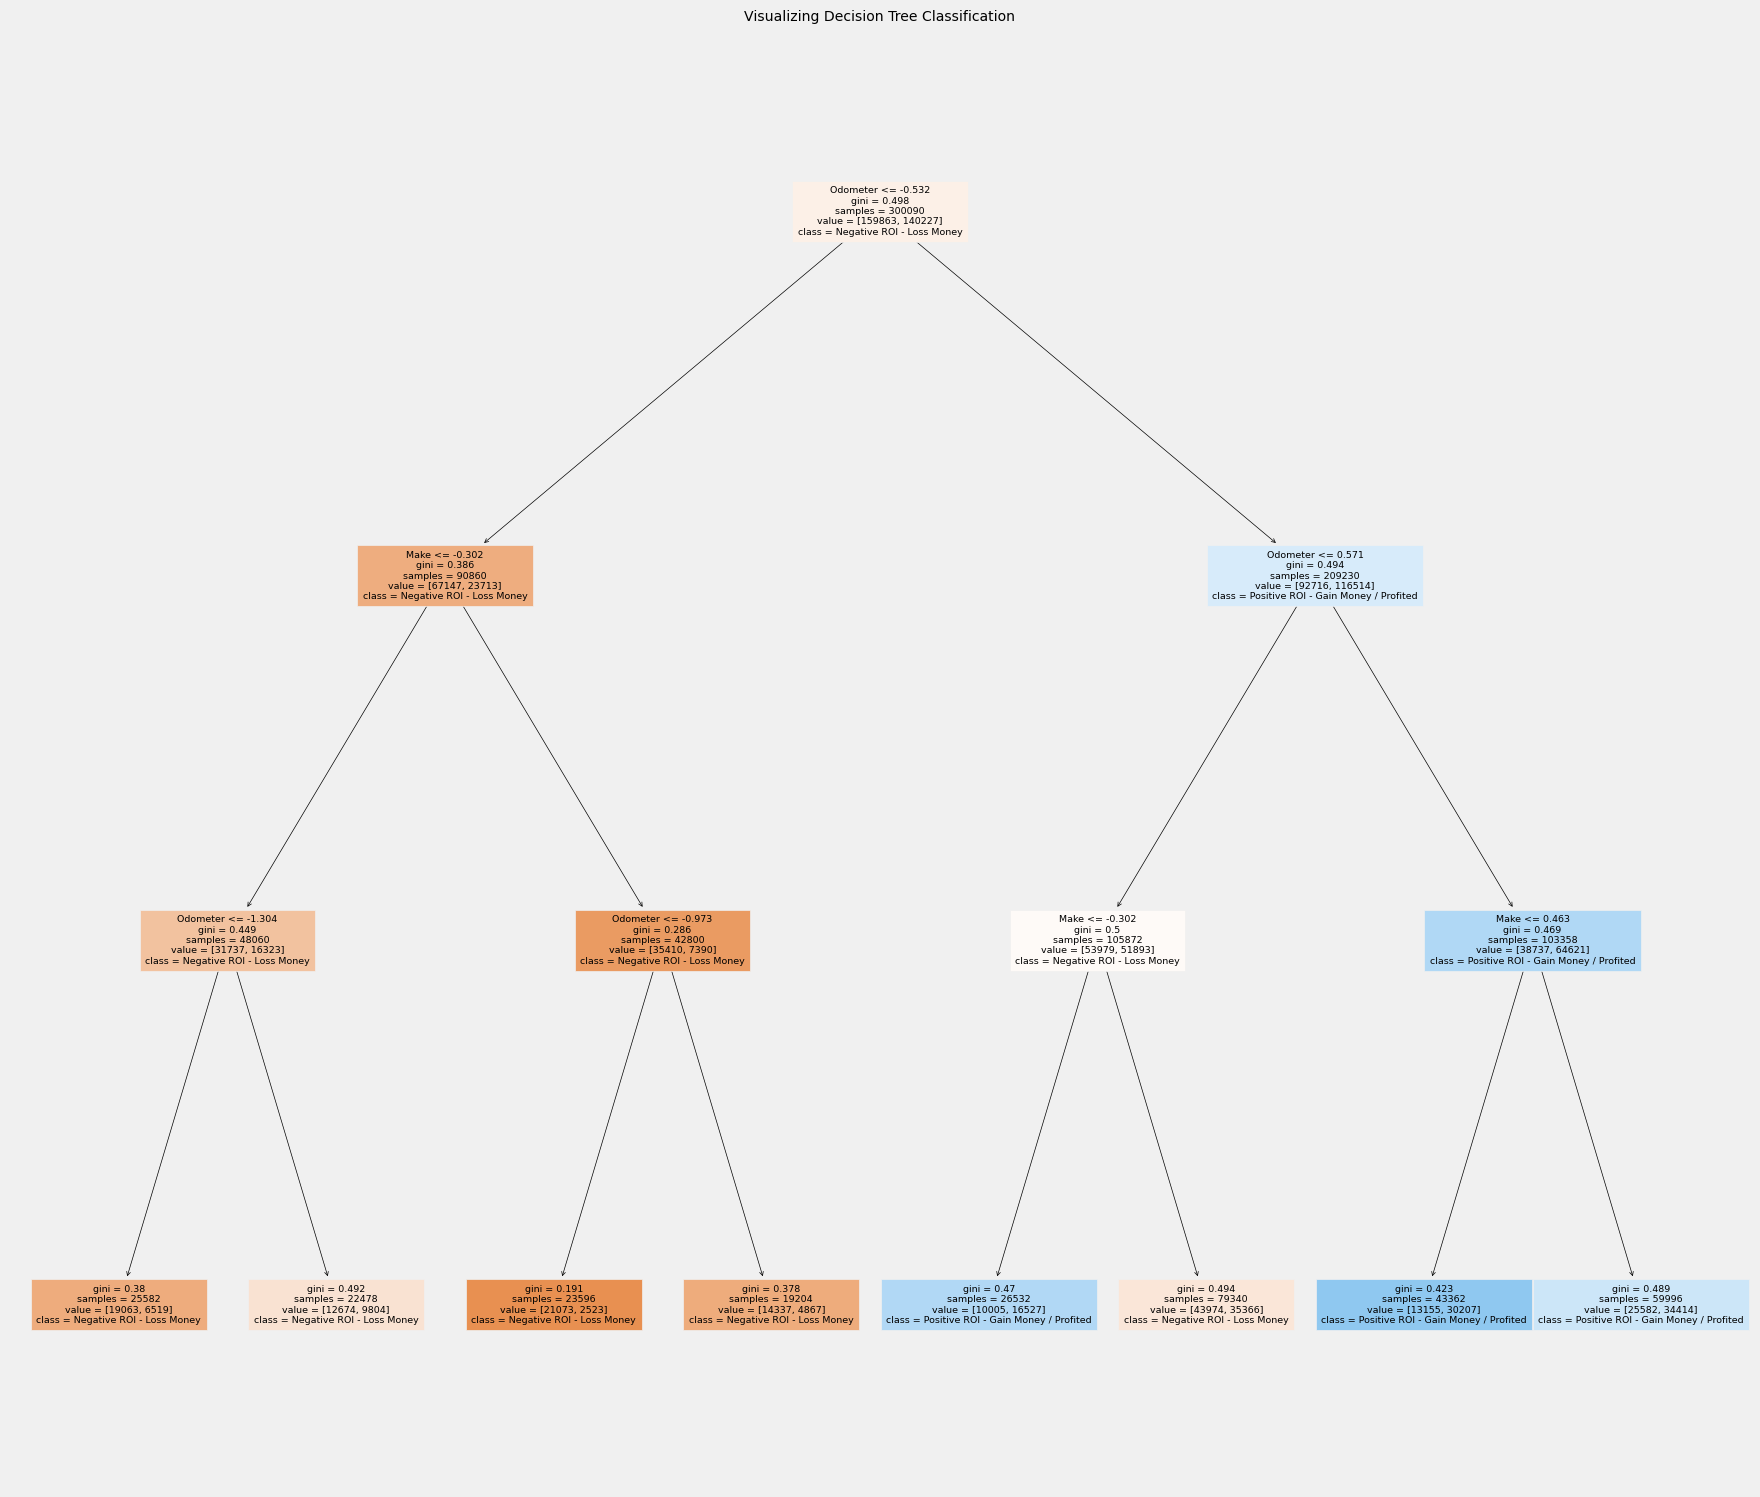

In [32]:
# Creates a visualization for the Decision-Tree Classifier data
plt.figure(figsize=(20, 18))
sk.tree.plot_tree(dt_classifier, feature_names=df.columns.tolist()[1:], filled=True, 
                  class_names=["Negative ROI - Loss Money", "Positive ROI - Gain Money / Profited"])
plt.title("Visualizing Decision Tree Classification")
plt.show()

## Conclusions

- Based on the four methods of classification invoked here in this blog post, the best classification predictor for this problem out of all of the methods is the `LogisticRegression` Classifier with the highest accuracy score of 64.44% as well as the highest average and consistency of all of the classifier algorithms used here with across the board scoring 61.92%. 

- After reviewing the heatmap called `Correlation Heatmap Between All Aunctioning Used-Cars Quantitative Fcctors (2005-2015)` and the bar graph called `Correlation between ROI and Other Auctioned Car Features When Comparing Across All Auctioning Used-Cars in the Dataset (2005-2015)` in the `Machine Learning - Model Training and Evaluation` section of this blog post, I was surprised to see that the `Condition` qualitative column most correlated with the `ROI` computed column (through the subtraction of the `Selling Price` and the `MMR` (Manheim Market Report) columns) with about approximately `30%` correlation, higher than the 2nd-most correlated column - `Transmission` - by far at approximately `2.5%` correlation. In my opinion, I feel that this could be justified due to the fact that most younger-car buyers prefer a nice, asthetic interior and exterior as a primary selling-point considering to buy a used-car. Most people would take the general assumption that if the used-car to consider buying does not look at initial inspection, most prospective car-buyers would not invest any time further in looking into the performance specifics of the vehicle. This specific pattern could follow when investigating into the `Machine Learning` section that the `RandomForestClassifier` that the `Exterior Color` played a significant factor in this classification algorithm. However, this inference could be ultimately inconclusive due its described randomness.

- With careful experimentation in both the `Data Preprocessing - Cleaning and Analytics` and `Machine Learning - Model Training and Evaluation` sections of this blog post, it is of my opinion that the best factor that impacts `ROI` (and indirectly the classification of Used-Cars by human users) would be the `Condition` of the vehicle in-question at the time of sale.

- Ultimately, I learned a great deal from the blog post experience as I now better understand how to properly utilize different types of simple/basic Machine Learning classification through applying it to a practical, every-day dilemma in our society.

## Reference Sources and Citations (IEEE Format)

To complete this blog post, I used the following online sources as references for developing this:

[1] Car Auctions Dataset (Only Used Dataset Not Kaggle Notebook):

- G.S. Deepak Kumar, "Car Auctions - What influences the selling price?", 2021. [Online]. Available: https://www.kaggle.com/code/gsdeepakkumar/car-auctions-what-influences-the-selling-price/input?select=car_prices.csv. [Accessed: 07-Sep.-2023].

[2] Tutorial on Calculating Basic Machine Learning Model Evaluation Statistics:

- A. Essam, "Titanic Supervised Learning Classification", Jul.-2023. [Online]. Available: https://www.kaggle.com/code/aliessamali/titanic-supervised-learning-classification. [Accessed: 08-Sep.-2023].

[3] Tutorial on Random Forest Classifiers:

- P. Banerjee, "Random Forest Classifer Tutorial", 2019. [Online.] Available: https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial. [Accessed: 07-Sep.-2023].
